<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_2X/blob/main/GQtest_groupwise_(y_hat)_0_3_0_7_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_2X/groupwise_0.3_0.7'

In [4]:
os.listdir(base_path)

['data_groupwise_0.3_0.7_n250.csv',
 'data_groupwise_0.3_0.7_n120.csv',
 'data_groupwise_0.3_0.7_n60.csv',
 'data_groupwise_0.3_0.7_n30.csv',
 'data_groupwise_0.3_0.7_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.3_0.7_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,22.189264,69.467236,0.800352,102.456852,101.959102,0.497750
1,0.0,1.0,85.686989,98.117423,0.420522,194.224933,194.125733,0.099200
2,0.0,2.0,70.835478,90.436667,0.761899,172.034044,171.579220,0.454824
3,0.0,3.0,66.830898,64.422651,-0.812942,140.440607,141.315621,-0.875014
4,0.0,4.0,78.900123,56.782701,-0.547368,145.135456,145.616652,-0.481196
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,61.635560,95.036640,1.460252,168.132452,166.631025,1.501427
19996,999.0,16.0,51.874656,94.583156,-1.285835,155.171977,156.446963,-1.274986
19997,999.0,17.0,89.160758,91.534127,0.410639,191.105524,190.553704,0.551820
19998,999.0,18.0,88.809759,34.920403,-0.463621,133.266541,133.418586,-0.152045


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,22.189264,69.467236,0.800352,102.456852,101.959102,0.497750
1,0.0,1.0,85.686989,98.117423,0.420522,194.224933,194.125733,0.099200
2,0.0,2.0,70.835478,90.436667,0.761899,172.034044,171.579220,0.454824
3,0.0,3.0,66.830898,64.422651,-0.812942,140.440607,141.315621,-0.875014
4,0.0,4.0,78.900123,56.782701,-0.547368,145.135456,145.616652,-0.481196
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,61.635560,95.036640,1.460252,168.132452,166.631025,1.501427
19996,999.0,16.0,51.874656,94.583156,-1.285835,155.171977,156.446963,-1.274986
19997,999.0,17.0,89.160758,91.534127,0.410639,191.105524,190.553704,0.551820
19998,999.0,18.0,88.809759,34.920403,-0.463621,133.266541,133.418586,-0.152045


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    22.189264  69.467236  0.800352  102.456852  101.959102  0.497750
      1.0    85.686989  98.117423  0.420522  194.224933  194.125733  0.099200
      2.0    70.835478  90.436667  0.761899  172.034044  171.579220  0.454824
      3.0    66.830898  64.422651 -0.812942  140.440607  141.315621 -0.875014
      4.0    78.900123  56.782701 -0.547368  145.135456  145.616652 -0.481196
...                ...        ...       ...         ...         ...       ...
999.0 15.0   61.635560  95.036640  1.460252  168.132452  166.631025  1.501427
      16.0   51.874656  94.583156 -1.285835  155.171977  156.446963 -1.274986
      17.0   89.160758  91.534127  0.410639  191.105524  190.553704  0.551820
      18.0   88.809759  34.920403 -0.463621  133.266541  133.418586 -0.152045
      19.0   27.796045  43.783495  0.583096   82.162636   81.492972  0.669664

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    22.189264  69.467236  0.800352  102.456852  101.959102  0.497750
      1.0    85.686989  98.117423  0.420522  194.224933  194.125733  0.099200
      2.0    70.835478  90.436667  0.761899  172.034044  171.579220  0.454824
      3.0    66.830898  64.422651 -0.812942  140.440607  141.315621 -0.875014
      4.0    78.900123  56.782701 -0.547368  145.135456  145.616652 -0.481196
...                ...        ...       ...         ...         ...       ...
999.0 15.0   61.635560  95.036640  1.460252  168.132452  166.631025  1.501427
      16.0   51.874656  94.583156 -1.285835  155.171977  156.446963 -1.274986
      17.0   89.160758  91.534127  0.410639  191.105524  190.553704  0.551820
      18.0   88.809759  34.920403 -0.463621  133.266541  133.418586 -0.152045
      19.0   27.796045  43.783495  0.583096   82.162636   81.492972  0.669664

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,22.189264,69.467236,0.800352,102.456852,101.959102,0.497750
1,0.0,1.0,85.686989,98.117423,0.420522,194.224933,194.125733,0.099200
2,0.0,2.0,70.835478,90.436667,0.761899,172.034044,171.579220,0.454824
3,0.0,3.0,66.830898,64.422651,-0.812942,140.440607,141.315621,-0.875014
4,0.0,4.0,78.900123,56.782701,-0.547368,145.135456,145.616652,-0.481196
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,61.635560,95.036640,1.460252,168.132452,166.631025,1.501427
19996,999.0,16.0,51.874656,94.583156,-1.285835,155.171977,156.446963,-1.274986
19997,999.0,17.0,89.160758,91.534127,0.410639,191.105524,190.553704,0.551820
19998,999.0,18.0,88.809759,34.920403,-0.463621,133.266541,133.418586,-0.152045


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    22.189264  69.467236  0.800352  102.456852  101.959102  0.497750
      1.0    85.686989  98.117423  0.420522  194.224933  194.125733  0.099200
      2.0    70.835478  90.436667  0.761899  172.034044  171.579220  0.454824
      3.0    66.830898  64.422651 -0.812942  140.440607  141.315621 -0.875014
      4.0    78.900123  56.782701 -0.547368  145.135456  145.616652 -0.481196
...                ...        ...       ...         ...         ...       ...
999.0 15.0   61.635560  95.036640  1.460252  168.132452  166.631025  1.501427
      16.0   51.874656  94.583156 -1.285835  155.171977  156.446963 -1.274986
      17.0   89.160758  91.534127  0.410639  191.105524  190.553704  0.551820
      18.0   88.809759  34.920403 -0.463621  133.266541  133.418586 -0.152045
      19.0   27.796045  43.783495  0.583096   82.162636   81.492972  0.669664

[20000 rows x 6 columns]

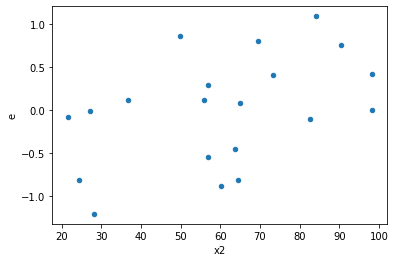

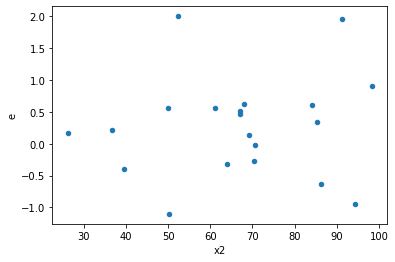

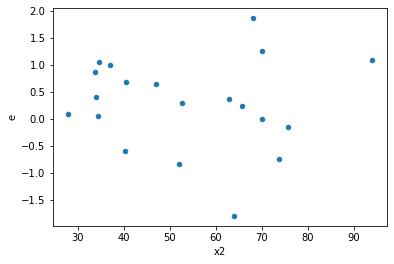

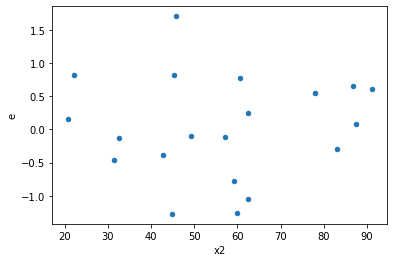

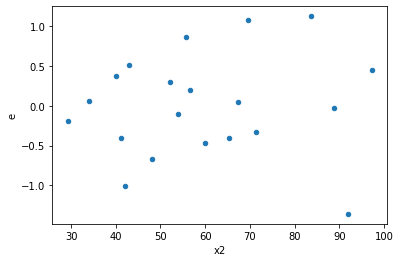

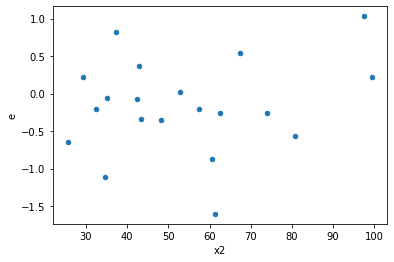

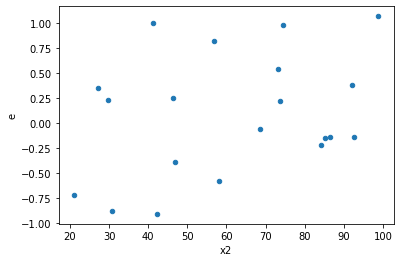

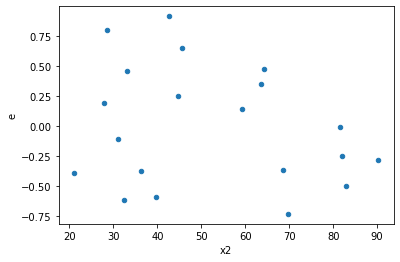

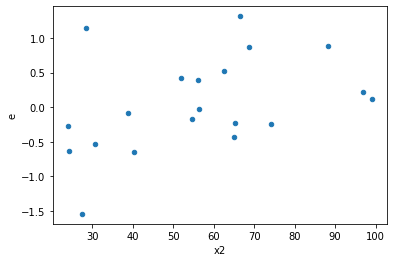

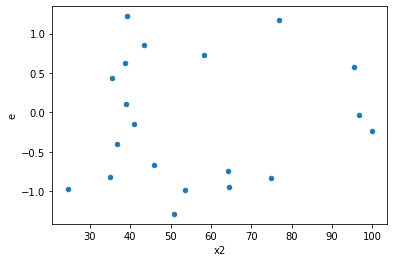

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # Correlation between two columns of DataFrame.
    corr_x1 = table['x1'].corr(table['Y'])
    corr_x2 = table['x2'].corr(table['Y'])

    # Correlation between all the columns of DataFrame.
    all_corr = table.corr()

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return corr_x1, corr_x2, df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_corr_x1=[]
list_corr_x2=[]
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    corr_x1, corr_x2, df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_corr_x1.append(corr_x1)
    list_corr_x2.append(corr_x2)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "corr_x1":list_corr_x1, "corr_x2":list_corr_x2, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,corr_x1,corr_x2,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,,,
2.0,0.7042476463257822,0.7087628583594584,6.0,6.0,0.7247819208495223,8.897502752163687,0.12079698680825372,1.4829171253606146,12.276110228763512,0.007610478968043344,0.9961947605159783,0.003805239484021672,Reject001=0 : Heteroscedasticity
3.0,0.7042476463257822,0.7087628583594584,6.0,6.0,1.0589008941115101,1.4967902617929474,0.17648348235191835,0.2494650436321579,1.4135319651881646,0.6849716480278869,0.6575141759860565,0.34248582401394345,Reject001=1 : Homoscedasticity
4.0,0.7042476463257822,0.7087628583594584,6.0,6.0,1.5264422356932905,2.2934563491039723,0.2544070392822151,0.3822427248506621,1.5024848602032517,0.6335077909366045,0.6832461045316978,0.31675389546830224,Reject001=1 : Homoscedasticity
5.0,0.7042476463257822,0.7087628583594584,6.0,6.0,1.896136218800935,2.6602745412088247,0.3160227031334892,0.44337909020147076,1.4029975878479395,0.6913971299990531,0.6543014350004734,0.34569856499952656,Reject001=1 : Homoscedasticity
11.0,0.7042476463257822,0.7087628583594584,6.0,6.0,1.051847880640078,3.1556234862244708,0.17530798010667967,0.5259372477040785,3.000075908603997,0.20702124283454215,0.8964893785827289,0.10351062141727108,Reject001=1 : Homoscedasticity
14.0,0.7042476463257822,0.7087628583594584,6.0,6.0,3.632372930788737,4.496303013829889,0.6053954884647895,0.7493838356383149,1.2378417908905508,0.8022172662325988,0.5988913668837006,0.4011086331162994,Reject001=1 : Homoscedasticity
17.0,0.7042476463257822,0.7087628583594584,6.0,6.0,0.46749017831089235,1.3277702680771937,0.07791502971848206,0.2212950446795323,2.8402099759071175,0.22957956634290588,0.8852102168285471,0.11478978317145294,Reject001=1 : Homoscedasticity
20.0,0.7042476463257822,0.7087628583594584,6.0,6.0,2.2687330653320923,6.634959580819321,0.3781221775553487,1.1058265968032202,2.9245219202762884,0.2173031022180656,0.8913484488909672,0.1086515511090328,Reject001=1 : Homoscedasticity
22.0,0.7042476463257822,0.7087628583594584,6.0,6.0,1.6105569259033619,3.8837123981263164,0.268426154317227,0.6472853996877194,2.4114095786759853,0.30823171345344247,0.8458841432732788,0.15411585672672123,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "corr_x1":list_corr_x1, "corr_x2":list_corr_x2, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,corr_x1,corr_x2,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,,,
0.0,0.7042476463257822,0.7087628583594584,6.0,6.0,1.4887164316830648,1.186668757210545,0.2481194052805108,0.1977781262017575,0.7971086581404623,0.7901067217871545,Reject001=1 : Homoscedasticity
1.0,0.7042476463257822,0.7087628583594584,6.0,6.0,5.4442097348683305,0.9462693681585899,0.9073682891447218,0.15771156135976497,0.173812070849889,0.051365839663842915,Reject001=1 : Homoscedasticity
2.0,0.7042476463257822,0.7087628583594584,6.0,6.0,0.7247819208495223,8.897502752163687,0.12079698680825372,1.4829171253606146,12.276110228763512,0.007610478968043344,Reject001=0 : Heteroscedasticity
3.0,0.7042476463257822,0.7087628583594584,6.0,6.0,1.0589008941115101,1.4967902617929474,0.17648348235191835,0.2494650436321579,1.4135319651881646,0.6849716480278869,Reject001=1 : Homoscedasticity
4.0,0.7042476463257822,0.7087628583594584,6.0,6.0,1.5264422356932905,2.2934563491039723,0.2544070392822151,0.3822427248506621,1.5024848602032517,0.6335077909366045,Reject001=1 : Homoscedasticity
5.0,0.7042476463257822,0.7087628583594584,6.0,6.0,1.896136218800935,2.6602745412088247,0.3160227031334892,0.44337909020147076,1.4029975878479395,0.6913971299990531,Reject001=1 : Homoscedasticity
6.0,0.7042476463257822,0.7087628583594584,6.0,6.0,1.1249702269307387,1.0065340744712588,0.18749503782178978,0.16775567907854314,0.8947206338228081,0.8960306432749655,Reject001=1 : Homoscedasticity
7.0,0.7042476463257822,0.7087628583594584,6.0,6.0,2.2745159836516446,0.5935378626089284,0.3790859972752741,0.09892297710148806,0.2609512823277799,0.12679033529600278,Reject001=1 : Homoscedasticity
8.0,0.7042476463257822,0.7087628583594584,6.0,6.0,2.49729523995444,1.2692150771243305,0.41621587332574,0.2115358461873884,0.5082358933049044,0.430598060454162,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      973
Reject001=0 : Heteroscedasticity     27
Name: Result_test, dtype: int64